In [2]:
reload("TensorFlow")
reload("ColoringNames")

In [5]:
using ColoringNames
using JLD
using MLLabelUtils
using MLDataPattern
using Plots
using DataFrames
using Glob


INFO: Recompiling stale cache file /home/ubuntu/.julia/lib/v0.5/Glob.ji for module Glob.


In [13]:
full_param_path = "../models/good/1706031148_sib0.5/params.jld"
full_params = load(full_param_path)
#
#
full_mdl = restore(TermToColorDistributionNetwork, full_param_path, full_params["model_path"])
full_params["dev_set_results"]

2017-06-15 07:43:13.241943: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-15 07:43:13.242072: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-15 07:43:13.242084: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-06-15 07:43:13.242096: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use FMA instructions, but these are available on your machine and could speed up CPU computations.


Dict{Symbol,Float64} with 5 entries:
  :perp        => 27.1822
  :mse_to_peak => 0.142116
  :perp_sat    => 41.6243
  :perp_hue    => 15.347
  :perp_val    => 31.44

In [14]:
extrapo_params_path = "../models/good/extrapolate_sib0.5/params.jld"
extrapo_params = load(extrapo_params_path)
#
#
extrapo_mdl = restore(TermToColorDistributionNetwork, extrapo_params_path)

extrapo_params["dev_set_results"]

In [15]:
empirical_params_path = "/mnt_obj/color/models/noml_validation/sib0.5_or64/params_with_model.jld"
empirical_params = load(empirical_params_path)
empiri_mdl = empirical_params["model"];

In [16]:
@assert full_mdl.encoding.label == extrapo_mdl.encoding.label
@assert full_mdl.embedding_dim==extrapo_mdl.embedding_dim
@assert full_mdl.hidden_layer_size==extrapo_mdl.hidden_layer_size


In [17]:
full_cldata = load_monroe_data()
extrapo_cldata = extrapolation_dataset(full_cldata, extrapo_params["eval_texts"])

LoadError: UndefVarError: SwiftService not defined

In [18]:
evaluate(full_mdl, extrapo_cldata.test.terms_padded, extrapo_cldata.test.colors)

LoadError: UndefVarError: extrapo_cldata not defined

In [19]:
df = DataFrame()
df[:name]=Float64[]
df

,name


In [10]:
DataFrames.

LoadError: syntax: incomplete: premature end of input

In [11]:
function per_color_eval(cldata, factor; mdls...)
    df = DataFrame(name=String[])
    col_name(ii) = Symbol(factor, :_, ii)
    for (ii, mdl) in mdls
        df[col_name(ii)] = Float64[]
    end
    for (color_name, inds) in labelmap(cldata.texts)
        terms_padded, color = datasubset((cldata.terms_padded, cldata.colors), inds, (ObsDim.Last(), ObsDim.First()))
        row = Dict{Symbol, Any}(:name=>color_name)
        for (ii, mdl) in mdls
            res = evaluate(mdl, terms_padded, color)
            row[col_name(ii)] = res[factor]
        end
        push!(df, row)
    end
    df
end

pc_df = per_color_eval(extrapo_cldata.dev, :perp; extrapo_mdl = extrapo_mdl, full_mdl=full_mdl) 

,name,perp_extrapo_mdl,perp_full_mdl
1,violet pink,23.461690750374377,24.303974544404383
2,deep violet,35.40815101305831,35.629633372779544
3,bright yellow,11.995374872232672,10.966903398955631
4,reddish,27.551558414697865,26.154638414498027
5,violet red,36.46136789021314,29.380140373289674
6,yellowish brown,21.997283403688343,21.724354901085313
7,red-pink,21.70466466630714,20.485874858472187
8,rosy pink,23.01742308028291,22.53483072522009
9,yellowish,19.135240971310466,18.783947611619293
10,orange-yellow,26.667578212898512,15.433700212574374


In [12]:
showall(sort!(pc_df; cols=:perp_extrapo_mdl))

100×3 DataFrames.DataFrame
│ Row │ name                  │ perp_extrapo_mdl │ perp_full_mdl │
├─────┼───────────────────────┼──────────────────┼───────────────┤
│ 1   │ "bright orange"       │ 11.5113          │ 11.3518       │
│ 2   │ "bright yellow"       │ 11.9954          │ 10.9669       │
│ 3   │ "orangish red"        │ 14.6196          │ 14.6698       │
│ 4   │ "yellowish orange"    │ 14.6763          │ 13.3793       │
│ 5   │ "orangey red"         │ 14.9967          │ 15.315        │
│ 6   │ "deep orange"         │ 15.217           │ 14.2928       │
│ 7   │ "lime yellow"         │ 15.6669          │ 15.7607       │
│ 8   │ "reddish orange"      │ 16.707           │ 16.1241       │
│ 9   │ "orangish"            │ 16.9777          │ 18.9435       │
│ 10  │ "orangish brown"      │ 17.4502          │ 17.0241       │
│ 11  │ "bright yellow green" │ 17.9712          │ 17.0592       │
│ 12  │ "brownish orange"     │ 18.1686          │ 18.1671       │
│ 13  │ "pink-red"            │ 18.

(h_max,s_max,v_max) = (0.359375,0.515625,0.984375)



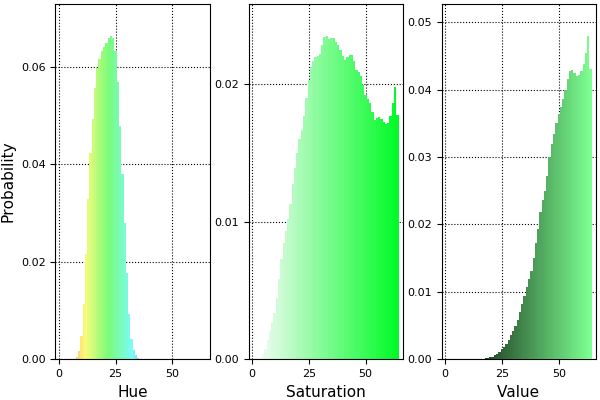

In [20]:
plot_hsv(query(full_mdl, "lightish green")...)

(h_max,s_max,v_max) = (0.359375,0.71875,0.90625)



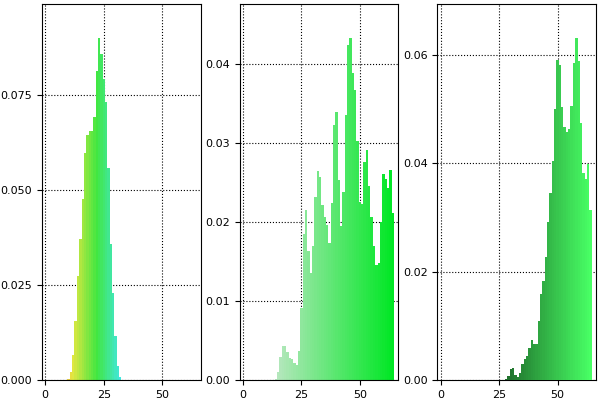

In [14]:
plot_hsv(query(empiri_mdl, "lightish green")...)

In [15]:
plot_hsv(query(extrapo_mdl, "lightish green")...)

(h_max,s_max,v_max) = (0.296875,0.40625,0.984375)


(h_max,s_max,v_max) = (0.78125,0.984375,0.734375)



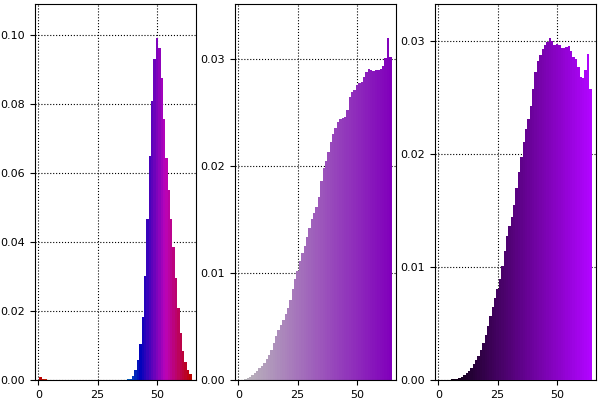

In [16]:
plot_hsv(query(full_mdl, "purple")...)

In [17]:
plot_hsv(query(empiri_mdl, "purple")...)

(h_max,s_max,v_max) = (0.78125,0.984375,0.75)


(h_max,s_max,v_max) = (1.0,0.984375,0.546875)



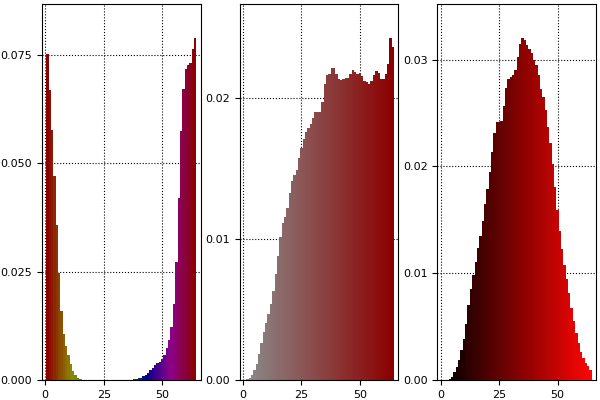

In [18]:
plot_hsv(query(full_mdl, "brownish purple")...)

(h_max,s_max,v_max) = (1.0,0.328125,0.484375)



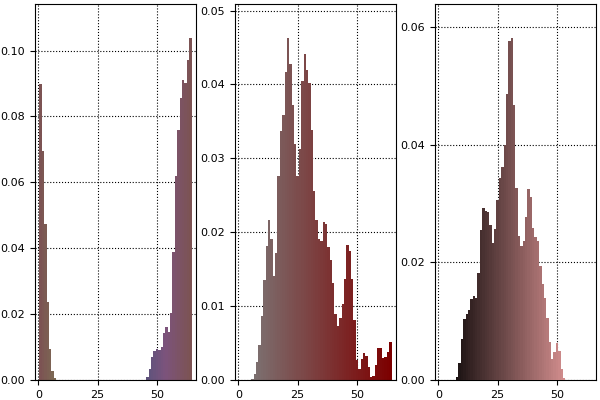

In [19]:
plot_hsv(query(empiri_mdl, "brownish purple")...)

(h_max,s_max,v_max) = (0.765625,0.984375,0.546875)



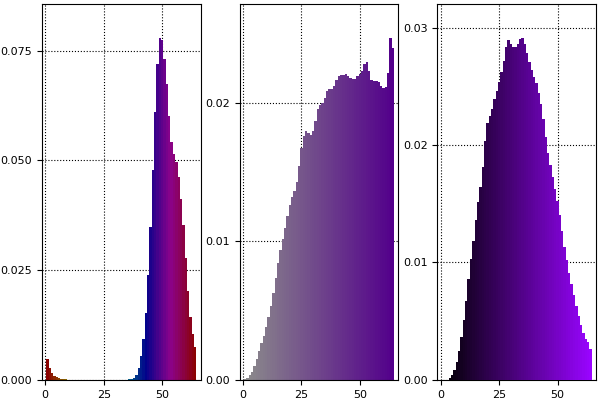

In [20]:
plot_hsv(query(extrapo_mdl, "brownish purple")...)

In [21]:
full_cldata.encoding

MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311}(SubString{String}["acid","green","adobe","algae","almost","black","amber","amethyst","apple","apricot"  …  "vivid","vomit","warm","watermelon","weird","wheat","wine","wintergreen","wisteria","yuck"],Dict("russet"=>255,"celery"=>86,"lipstick"=>199,"dull"=>139,"chocolate"=>93,"sepia"=>263,"fern"=>152,"sickly"=>267,"y"=>44,"heliotrope"=>173…))

(h_max,s_max,v_max) = (0.0625,0.984375,0.984375)



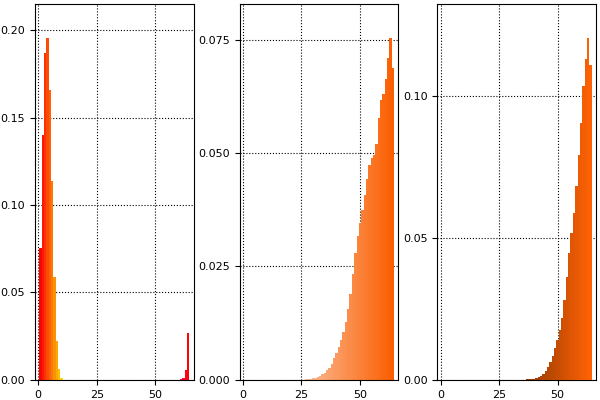

In [22]:
plot_hsv(query(full_mdl, "bright orange")...)

In [23]:
plot_hsv(query(extrapo_mdl, "bright orange")...)

(h_max,s_max,v_max) = (0.078125,0.984375,0.984375)


(h_max,s_max,v_max) = (0.0625,0.984375,1.0)



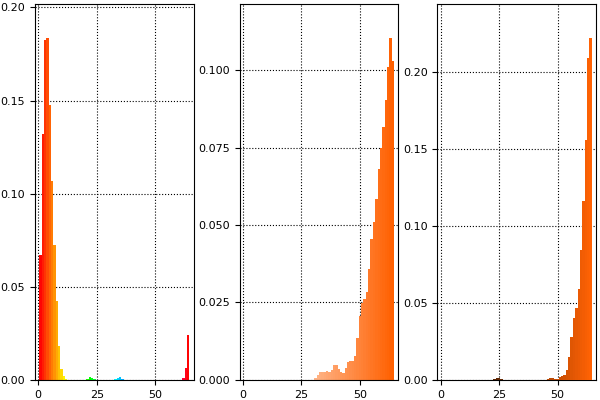

In [24]:
plot_hsv(query(empiri_mdl, "bright orange")...)


# Validation of the  Spread

In [12]:
df_spread = DataFrame(stddev=Float64[], perp=Float64[], mse_to_peak=Float64[], perp_sat=Float64[], perp_hue=Float64[], perp_val=Float64[])
for fn in glob(glob"../models/extrapolation/*/params.jld")
    res, std = load(fn, "dev_set_results", "splay_std_dev")
    res[:stddev] = std
    push!(df_spread, res)
end

df_spread[:stddev_in_bins] = df_spread[:stddev]*64
df_spread

,stddev,perp,mse_to_peak,perp_sat,perp_hue,perp_val,stddev_in_bins
1,0.0009765625,26.84337728557002,0.18765536557531248,42.19838356793095,15.159559281906356,30.23632991163284,0.0625
2,0.001953125,26.945901279493757,0.19253416277617488,41.80605917535333,14.890676718984173,31.428559574862305,0.125
3,0.00390625,26.971984282142753,0.17899456227860522,42.44259039571466,14.7272718515847,31.391676333772494,0.25
4,0.0078125,26.4622287565382,0.17186207850768004,41.14670021802136,14.316668853371464,31.45591090550974,0.5
5,0.015625,27.33212089942834,0.18419326112007986,42.8506001660271,15.174659697430538,31.40104705897192,1.0
